In [1]:
import pickle
import numpy as np

# file = "res_woReOpt_500"
# file = "res_cluster"

# file = "res_wReOpt_500"
# file = "res_VRP"
# file = "res_VRP_fullDyn"
# file = "res_VRP_DoD100_Q100"
# file = "res_TSP_DoD100_Q100"
# file = "res_VRP4_DoD100_Q100"
file = "res_VRP4_DoD100_Q50"
# file = "res_VRP4_DoD100_Q50_uniform"
# file = "res_VRP4_DoD100_Q50_different_quantities"
# file = "res_VRP2_DoD100_Q100_cluster"

w = 'wReOpt'
wo = 'woReOpt'
# file = "res_TSP"
# file = "res_TSP_fullDynamic"
with open(f'results/{file}/{w}/env_configs.pkl', 'rb') as f:
    env_configs = pickle.load(f)
try:
    env_configs["horizon"] = env_configs["K"]
    env_configs.pop("K")
except:
    pass
print(env_configs)


with open(f'results/{file}/res_offline.pkl', "rb") as f:
    res_offline = pickle.load(f)

# with open(f'results/{file}/res_SL.pkl', "rb") as f:
#     res_SL = pickle.load(f)

with open(f'results/{file}/{w}/res_MSA.pkl', "rb") as f:
    res_MSA = pickle.load(f)

with open(f'results/{file}/{w}/res_fafs.pkl', "rb") as f:
    res_greedy = pickle.load(f)

# with open(f'results/{file}/{w}/res_random.pkl', "rb") as f:
#     res_random = pickle.load(f)

# with open(f'results/{file}/{wo}/res_greedy.pkl', "rb") as f:
#     res_greedy_wo = pickle.load(f)

# with open(f'results/{file}/{wo}/res_random.pkl', "rb") as f:
#     res_random_wo = pickle.load(f)

{'horizon': 100, 'Q': 50, 'DoD': 1.0, 'vehicle_capacity': 20, 're_optimization': True, 'emissions_KM': [0.1, 0.1, 0.3, 0.3], 'test': True, 'vehicle_assignment': True}


In [2]:
from methods.agent import DQNAgent
from envs import DynamicQVRPEnv

In [3]:
env_configs['vehicle_assignment'] = True
# env_configs['static_as_dynamic'] = True
# env_configs['noise_horizon'] = .2
env_configs['re_optimization'] = False
# env_configs['unknown_p'] = True
env_configs['test'] = False
env_configs['n_scenarios'] = 500
env_configs['k_med'] = 7
env_configs['vehicle_capacity'] = 20

VA_comment = 'VA'
# comment = 'different_qs'
# comment = 'static_as_dynamic'
comment = 'medianWOp'

env = DynamicQVRPEnv(**env_configs)
agent = DQNAgent(
    env, 
    env_configs=env_configs, 
    algo=f'DQN_{comment}_VRP{len(env_configs['emissions_KM'])}Q{env_configs['Q']}_{VA_comment}',
    load_model=False,
)

In [4]:
test_rs = agent.train(5000)

0 : 23.180
200  : 20.170
best ! mean rewards : 20.170
400  : 13.080
600  : 14.360
800  : 27.130
best ! mean rewards : 27.130
1000  : 22.180
1200  : 31.750
best ! mean rewards : 31.750
1400  : 31.220
1600  : 33.680
best ! mean rewards : 33.680
1800  : 33.570
2000  : 28.260
2200  : 31.900
2400  : 34.480
best ! mean rewards : 34.480
2600  : 34.590
best ! mean rewards : 34.590
2800  : 34.660
best ! mean rewards : 34.660
3000  : 34.300
3200  : 33.940
3400  : 34.450
3600  : 34.540
3800  : 35.310
best ! mean rewards : 35.310
4000  : 35.950
best ! mean rewards : 35.950
4200  : 35.450
4400  : 35.500
4600  : 33.680
4800  : 34.640
5000  : 33.930
Complete


### visual

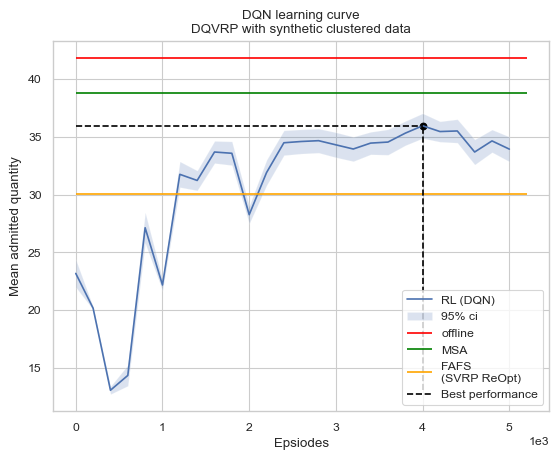

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.color_palette("deep")
sns.set_theme('paper', 'whitegrid')

# test_rs = np.load('results/rewards_DQN_perturbed_Q_VRP4Q50_VA.npy')
# test_rs = np.load('results/rewards_DQN_different_qs_VRP4Q50_VA.npy')
eval_every = 200
y_test = np.mean(test_rs, 1)
arg_max = np.argmax(y_test)
std_test = np.std(test_rs, 1)/np.sqrt(len(test_rs[0]))
plt.plot(eval_every*np.arange(len(y_test)), y_test, label="RL (DQN)")
plt.fill_between(
    eval_every*np.arange(len(y_test)), 
    y_test - 2*std_test, 
    y_test + 2*std_test, 
    alpha=0.2,
    label = "95% ci")

# plt.hlines(res_SL["rs"].mean(), 0, eval_every*len(y), 'black', label="SL", linestyles='--')
plt.hlines(res_offline["rs"].mean(), 0, eval_every*len(y_test), 'red', label="offline", linestyles='solid')
plt.hlines(res_MSA["rs"].mean(), 0, eval_every*len(y_test), 'green', label="MSA", linestyles='solid')
plt.hlines(res_greedy["rs"].mean(), 0, eval_every*len(y_test), 'orange', label="FAFS\n(SVRP ReOpt)", linestyles='solid')
# plt.hlines(res_random["rs"].mean(), 0, eval_every*len(y_test), 'gray', label="random\nw/ ReOpt", linestyles='solid')

plt.hlines(y_test[arg_max], 0, eval_every*arg_max, 'black', label="Best performance", linestyles='dashed')
plt.vlines(eval_every*arg_max, np.amin(y_test), y_test[arg_max], 'black', linestyles='dashed')
plt.scatter(eval_every*arg_max, y_test[arg_max], c  = 'black')#, label="Best performance", linestyles='dashed')
# plt.hlines(res_greedy_wo["rs"].mean(), 0, eval_every*len(y_test), 'orange', label="greedy", linestyles='--')
# plt.hlines(y_test[0], 0, eval_every*len(y_test), 'gray', label="random⁄⁄⁄", linestyles='--')


plt.gca().ticklabel_format(axis='x', style='sci', scilimits=(0, 0))
plt.xlabel('Epsiodes')
plt.ylabel('Mean admitted quantity')
plt.title(
#  f'DQN learning curve\nDQVRP with heterogeneous demand quantities'
 f'DQN learning curve\nDQVRP with synthetic clustered data'
)
plt.legend()
plt.show()

{'horizon': 100, 'Q': 50, 'DoD': 1.0, 'vehicle_capacity': 20, 're_optimization': True, 'emissions_KM': [0.1, 0.1, 0.3, 0.3], 'test': True, 'vehicle_assignment': True}


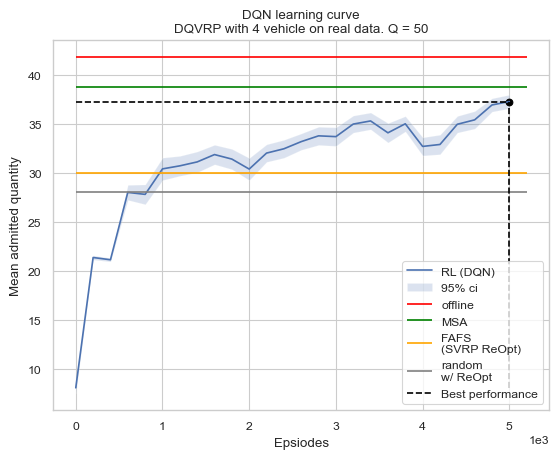

In [7]:
file = "res_VRP4_DoD100_Q50"
# file = "res_VRP4_DoD100_Q50_uniform"
# file = "res_VRP2_DoD100_Q100_cluster"

w = 'wReOpt'
wo = 'woReOpt'
# file = "res_TSP"
# file = "res_TSP_fullDynamic"
with open(f'results/{file}/{w}/env_configs.pkl', 'rb') as f:
    env_configs = pickle.load(f)
try:
    env_configs["horizon"] = env_configs["K"]
    env_configs.pop("K")
except:
    pass
print(env_configs)


with open(f'results/{file}/res_offline.pkl', "rb") as f:
    res_offline = pickle.load(f)

with open(f'results/{file}/{w}/res_MSA.pkl', "rb") as f:
    res_MSA = pickle.load(f)

with open(f'results/{file}/{w}/res_fafs.pkl', "rb") as f:
    res_greedy = pickle.load(f)

with open(f'results/{file}/{w}/res_random.pkl', "rb") as f:
    res_random = pickle.load(f)
    
    
import seaborn as sns
import matplotlib.pyplot as plt

sns.color_palette("deep")
sns.set_theme('paper', 'whitegrid')
    
test_rs = np.load('results/rewards_DQN_perturbed_Q_VRP4Q50_VA.npy')
eval_every = 200
y_test = np.mean(test_rs, 1)
arg_max = np.argmax(y_test)
std_test = np.std(test_rs, 1)/np.sqrt(len(test_rs[0]))
plt.plot(eval_every*np.arange(len(y_test)), y_test, label="RL (DQN)")
plt.fill_between(
    eval_every*np.arange(len(y_test)), 
    y_test - 2*std_test, 
    y_test + 2*std_test, 
    alpha=0.2,
    label = "95% ci")

# plt.hlines(res_SL["rs"].mean(), 0, eval_every*len(y), 'black', label="SL", linestyles='--')
plt.hlines(res_offline["rs"].mean(), 0, eval_every*len(y_test), 'red', label="offline", linestyles='solid')
plt.hlines(res_MSA["rs"].mean(), 0, eval_every*len(y_test), 'green', label="MSA", linestyles='solid')
plt.hlines(res_greedy["rs"].mean(), 0, eval_every*len(y_test), 'orange', label="FAFS\n(SVRP ReOpt)", linestyles='solid')
plt.hlines(res_random["rs"].mean(), 0, eval_every*len(y_test), 'gray', label="random\nw/ ReOpt", linestyles='solid')

plt.hlines(y_test[arg_max], 0, eval_every*arg_max, 'black', label="Best performance", linestyles='dashed')
plt.vlines(eval_every*arg_max, np.amin(y_test), y_test[arg_max], 'black', linestyles='dashed')
plt.scatter(eval_every*arg_max, y_test[arg_max], c  = 'black')#, label="Best performance", linestyles='dashed')
# plt.hlines(res_greedy_wo["rs"].mean(), 0, eval_every*len(y_test), 'orange', label="greedy", linestyles='--')
# plt.hlines(y_test[0], 0, eval_every*len(y_test), 'gray', label="random⁄⁄⁄", linestyles='--')


plt.gca().ticklabel_format(axis='x', style='sci', scilimits=(0, 0))
plt.xlabel('Epsiodes')
plt.ylabel('Mean admitted quantity')
plt.title(
 f'DQN learning curve\nDQVRP with {len(env_configs['emissions_KM'])} vehicle on real data. Q = {env_configs["Q"]}'
#  f'DQN learning curve\nDQVRP with {len(env_configs['emissions_KM'])} vehicle on synthetic data with uniform distribution. Q = {env_configs["Q"]}'
#  f'DQN learning curve\nDQVRP with {len(env_configs['emissions_KM'])} vehicle on synthetic data with clustered distribution. Q = {env_configs["Q"]}'
)
plt.legend()
plt.show()

### static as dynamic

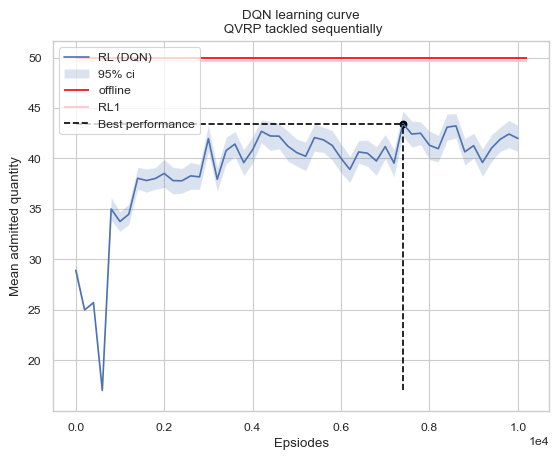

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.color_palette("deep")
sns.set_theme('paper', 'whitegrid')

with open(f'results/static/real_res_offline_K100.pkl', 'rb') as f: res_offline = pickle.load(f)
with open(f'results/static/real_res_RL_K100_n100_ReOptimizedEvery1.pkl', 'rb') as f: dataRL1 = pickle.load(f)

test_rs = np.load('results/rewards_DQN_static_as_dynamic_VRP4Q50_VA.npy')
# test_rs = np.load('results/rewards_DQN_different_qs_VRP4Q50_VA.npy')
eval_every = 200
y_test = np.mean(test_rs, 1)
arg_max = np.argmax(y_test)
std_test = np.std(test_rs, 1)/np.sqrt(len(test_rs[0]))
plt.plot(eval_every*np.arange(len(y_test)), y_test, label="RL (DQN)")
plt.fill_between(
    eval_every*np.arange(len(y_test)), 
    y_test - 2*std_test, 
    y_test + 2*std_test, 
    alpha=0.2,
    label = "95% ci")

plt.hlines(res_offline["rs"].mean(), 0, eval_every*len(y_test), 'red', label="offline", linestyles='solid')
plt.hlines(np.mean(
    [dataRL1[i]['r'] for i in dataRL1.keys()]
    ), 0, eval_every*len(y_test), 'pink', label="RL1", linestyles='solid')

plt.hlines(y_test[arg_max], 0, eval_every*arg_max, 'black', label="Best performance", linestyles='dashed')
plt.vlines(eval_every*arg_max, np.amin(y_test), y_test[arg_max], 'black', linestyles='dashed')
plt.scatter(eval_every*arg_max, y_test[arg_max], c  = 'black')#, label="Best performance", linestyles='dashed')
# plt.hlines(res_greedy_wo["rs"].mean(), 0, eval_every*len(y_test), 'orange', label="greedy", linestyles='--')
# plt.hlines(y_test[0], 0, eval_every*len(y_test), 'gray', label="random⁄⁄⁄", linestyles='--')


plt.gca().ticklabel_format(axis='x', style='sci', scilimits=(0, 0))
plt.xlabel('Epsiodes')
plt.ylabel('Mean admitted quantity')
plt.title(
 f'DQN learning curve\n QVRP tackled sequentially'
#  f'DQN learning curve\nDQVRP with {len(env_configs['emissions_KM'])} vehicle on synthetic data with uniform distribution. Q = {env_configs["Q"]}'
)
plt.legend()
plt.show()